In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from tqdm import tqdm

In [2]:
N = 101
r = np.linspace(0.,10.,N)
phi = np.linspace(0,(1/2)*np.pi,N)
dr = r[1] - r[0]
dphi = phi[1] - phi[0]
lambda_ = dr/dphi
print(lambda_)
print(dr)

6.366197723675813
0.1


In [3]:
def h(r):
    
    if r == 10.:
        return 100.
    else:
        return 0.

In [4]:
def InitT():
    
    T = np.zeros((N,N))
    
    for i in range(len(r)):
        for j in range(len(phi)):
            
            T[i, j] = h(r[i])
        
    return T

In [5]:
T = InitT()

In [6]:
T

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [100., 100., 100., ..., 100., 100., 100.]])

In [7]:
def Relajacion(T,r,phi,Nit = int(1e5), omega = 1.0 ,tolerancia = 1e-4):
    
    itmax = 0
    
    
    for it in tqdm(range(Nit)):
        
        dmax = 0.
        
       # print(r)
        
        for i in range(1, len(r)-1):
            for j in range(1, len(phi)-1):
                
                
                if j == len(phi) - 2:
                    b = 1
                else:
                    b = j+1
                
                
                c = 2 - dr/r[i] + 2*(lambda_/r[i])**2
                
                tmp = T[i+1,j] + (1-dr/r[i])*T[i-1,j] + ((lambda_/r[i])**2)*(T[i,b] + T[i,j-1])
                tmp /= c
                
                # Matriz resta
                r1 = omega*(tmp - T[i,j])
                
                # Actualizo la matrix
                T[i,j] += r1
                
        
                if np.abs(r1) > dmax:
                    dmax = r1

        
        if np.abs(dmax) < tolerancia:
            itmax = it
            break
            
    return T,itmax
        

In [8]:
T = InitT()
Tf1,_ =  Relajacion(T,r,phi)

  6%|▌         | 6143/100000 [05:39<1:26:34, 18.07it/s]


<IPython.core.display.Javascript object>


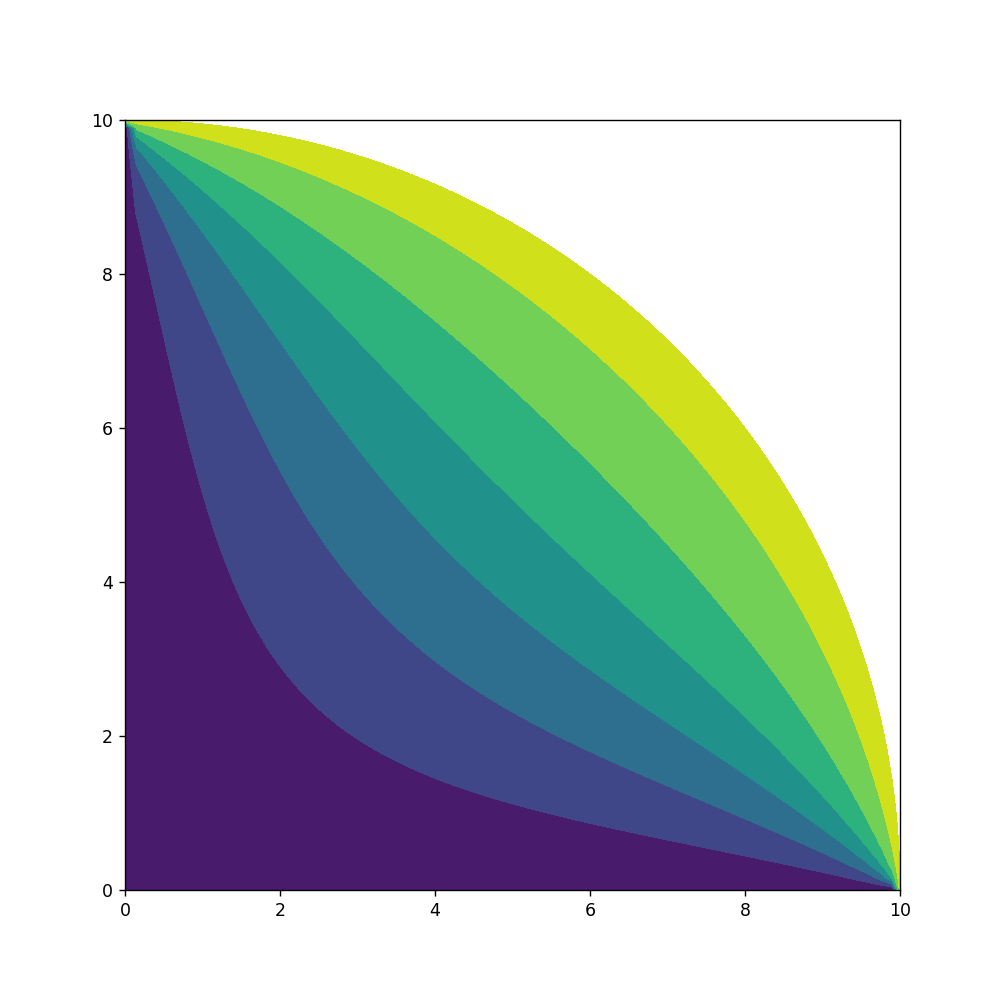

In [12]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

R, Phi = np.meshgrid(r,phi)

X,Y = R*np.cos(Phi),R*np.sin(Phi)


c = ax.contourf(X,Y,T.T)